In [1]:
api_key="Your api key from Binance"
secret_key="Your Secret key from Binance"

In [2]:
!pip install python-binance pandas mplfinance plotly

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [4]:
client = Client(api_key,secret_key)

In [5]:
tickers = client.get_all_tickers()

In [6]:
tickers_pdf =pd.DataFrame(tickers)

In [7]:
tickers_pdf.head()

,symbol,price
0,ETHBTC,0.06913800
1,LTCBTC,0.00317100
2,BNBBTC,0.01096300
3,NEOBTC,0.00042800
4,QTUMETH,0.00157800


In [8]:
tickers_pdf.tail()

,symbol,price
2187,RDNTTUSD,0.43890000
2188,ARBRUB,138.00000000
2189,JOETRY,12.82000000
2190,MAGICTRY,30.80000000
2191,USDTPLN,4.24900000


In [9]:
tickers_pdf.set_index('symbol',inplace=True)

In [10]:
tickers_pdf.head()

,price
symbol,
ETHBTC,0.06913800
LTCBTC,0.00317100
BNBBTC,0.01096300
NEOBTC,0.00042800
QTUMETH,0.00157800


In [11]:
tickers_pdf.loc['BTCUSDT']

price    30403.92000000
Name: BTCUSDT, dtype: object

In [12]:
depth = client.get_order_book(symbol='BTCUSDT')

In [13]:
depth_df=pd.DataFrame(depth['bids'])
depth_df.columns=['Price','Volume']
depth_df.head()

,Price,Volume
0,30403.92000000,1.14781000
1,30403.91000000,0.09140000
2,30403.88000000,0.62661000
3,30403.86000000,0.02621000
4,30403.81000000,0.49286000


In [14]:
depth

{'lastUpdateId': 36239484022,
 'bids': [['30403.92000000', '1.14781000'],
  ['30403.91000000', '0.09140000'],
  ['30403.88000000', '0.62661000'],
  ['30403.86000000', '0.02621000'],
  ['30403.81000000', '0.49286000'],
  ['30403.70000000', '0.00069000'],
  ['30403.68000000', '0.31390000'],
  ['30403.63000000', '0.59235000'],
  ['30403.61000000', '0.00070000'],
  ['30403.56000000', '0.59136000'],
  ['30403.54000000', '0.01025000'],
  ['30403.40000000', '0.00066000'],
  ['30403.33000000', '0.04111000'],
  ['30403.32000000', '0.00069000'],
  ['30403.14000000', '0.01587000'],
  ['30403.10000000', '0.60279000'],
  ['30403.09000000', '1.32719000'],
  ['30403.05000000', '0.00070000'],
  ['30402.94000000', '0.00069000'],
  ['30402.75000000', '0.00164000'],
  ['30402.74000000', '1.31199000'],
  ['30402.70000000', '0.00684000'],
  ['30402.60000000', '0.76548000'],
  ['30402.56000000', '0.00069000'],
  ['30402.50000000', '0.00066000'],
  ['30402.49000000', '0.00070000'],
  ['30402.18000000', '0.00

In [15]:
history = client.get_historical_klines('BTCUSDT',Client.KLINE_INTERVAL_1DAY,'1 Jan 2022')

In [16]:
hist_df = pd.DataFrame(history)

In [17]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [18]:
hist_df.columns=['OpenTime','Open','High','Low','Close','Volume','CloseTime','Quote Asset Volume','Number Of trades','TB base volume','TB quote volume','ignore']

In [19]:
hist_df.tail()


,OpenTime,Open,High,Low,Close,Volume,CloseTime,Quote Asset Volume,Number Of trades,TB base volume,TB quote volume,ignore
465,1681171200000,29637.35000000,30550.00000000,29590.00000000,30200.42000000,67990.07621000,1681257599999,2046078278.08211760,1340458,34766.92718000,1046250622.29345680,0
466,1681257600000,30200.43000000,30486.00000000,29637.40000000,29888.07000000,62049.48451000,1681343999999,1863497606.14153030,1246556,31136.38576000,935223730.57256700,0
467,1681344000000,29888.07000000,30595.00000000,29854.59000000,30373.84000000,51934.11731000,1681430399999,1571091101.12996720,1054144,26767.65298000,809748635.00258690,0
468,1681430400000,30373.84000000,31000.00000000,29966.00000000,30466.93000000,75984.19452000,1681516799999,2323267494.38023010,1504180,38406.59006000,1174371283.56516650,0
469,1681516800000,30466.93000000,30595.60000000,30278.08000000,30403.92000000,13798.60735000,1681603199999,419535934.19508720,398361,6688.72254000,203382539.45160990,0


In [20]:
hist_df['OpenTime']=pd.to_datetime(hist_df['OpenTime']/1000,unit = 's')


In [21]:
hist_df['CloseTime']=pd.to_datetime(hist_df['CloseTime']/1000,unit = 's')


In [22]:
hist_df.dtypes

OpenTime              datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
CloseTime             datetime64[ns]
Quote Asset Volume            object
Number Of trades               int64
TB base volume                object
TB quote volume               object
ignore                        object
dtype: object

In [23]:
number_convert=['Open','High','Low','Close','Volume','Quote Asset Volume','TB base volume','TB quote volume']
hist_df[number_convert]= hist_df[number_convert].apply(pd.to_numeric,axis = 1)

In [24]:
hist_df.tail()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,Quote Asset Volume,Number Of trades,TB base volume,TB quote volume,ignore
465,2023-04-11,29637.35,30550.0,29590.00,30200.42,67990.07621,2023-04-11 23:59:59.999000064,2.046078e+09,1340458,34766.92718,1.046251e+09,0
466,2023-04-12,30200.43,30486.0,29637.40,29888.07,62049.48451,2023-04-12 23:59:59.999000064,1.863498e+09,1246556,31136.38576,9.352237e+08,0
467,2023-04-13,29888.07,30595.0,29854.59,30373.84,51934.11731,2023-04-13 23:59:59.999000064,1.571091e+09,1054144,26767.65298,8.097486e+08,0
468,2023-04-14,30373.84,31000.0,29966.00,30466.93,75984.19452,2023-04-14 23:59:59.999000064,2.323267e+09,1504180,38406.59006,1.174371e+09,0
469,2023-04-15,30466.93,30595.6,30278.08,30403.92,13798.60735,2023-04-15 23:59:59.999000064,4.195359e+08,398361,6688.72254,2.033825e+08,0


In [25]:
hist_df.dtypes

OpenTime              datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
CloseTime             datetime64[ns]
Quote Asset Volume           float64
Number Of trades               int64
TB base volume               float64
TB quote volume              float64
ignore                        object
dtype: object

In [26]:
import mplfinance as mpf
hist_df.set_index('CloseTime').tail(50)

,OpenTime,Open,High,Low,Close,Volume,Quote Asset Volume,Number Of trades,TB base volume,TB quote volume,ignore
CloseTime,,,,,,,,,,,
2023-02-25 23:59:59.999000064,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,4.406286e+09,9124568,94440.13964,2.175284e+09,0
2023-02-26 23:59:59.999000064,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,4.716158e+09,9506015,101003.39278,2.354572e+09,0
2023-02-27 23:59:59.999000064,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,6.659786e+09,11754195,141360.04845,3.318354e+09,0
2023-02-28 23:59:59.999000064,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,6.172931e+09,9568743,131200.82704,3.066250e+09,0
2023-03-01 23:59:59.999000064,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,7.441571e+09,9390487,157961.92667,3.728257e+09,0
2023-03-02 23:59:59.999000064,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.45219,5.603770e+09,7435815,119522.00584,2.798798e+09,0
2023-03-03 23:59:59.999000064,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.19785,7.167185e+09,8214639,156827.31366,3.512245e+09,0
2023-03-04 23:59:59.999000064,2023-03-04,22354.34,22410.00,22157.08,22346.57,121257.38132,2.706423e+09,4169260,60043.33153,1.340205e+09,0
2023-03-05 23:59:59.999000064,2023-03-05,22346.57,22662.09,22189.22,22430.24,154841.75786,3.473011e+09,4835978,77394.35765,1.735989e+09,0


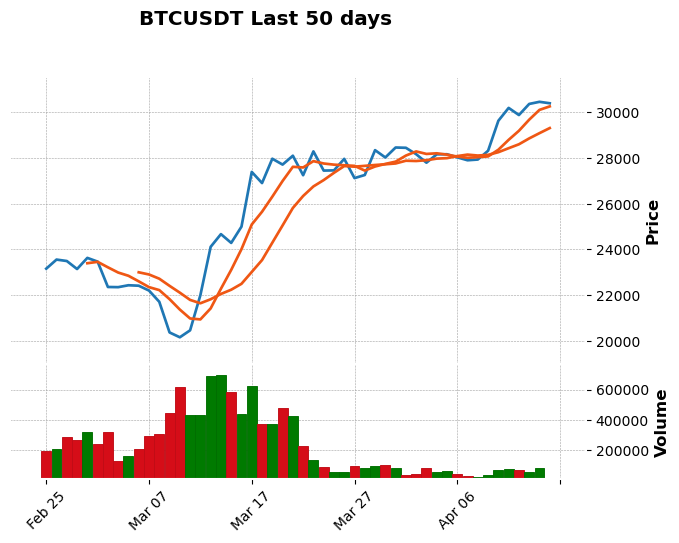

In [27]:
mpf.plot(hist_df.set_index('CloseTime').tail(50),type = 'line',style='charles',
                                                                  volume = True,
                                                                 title ='BTCUSDT Last 50 days',
                                                                 mav=(5,10))

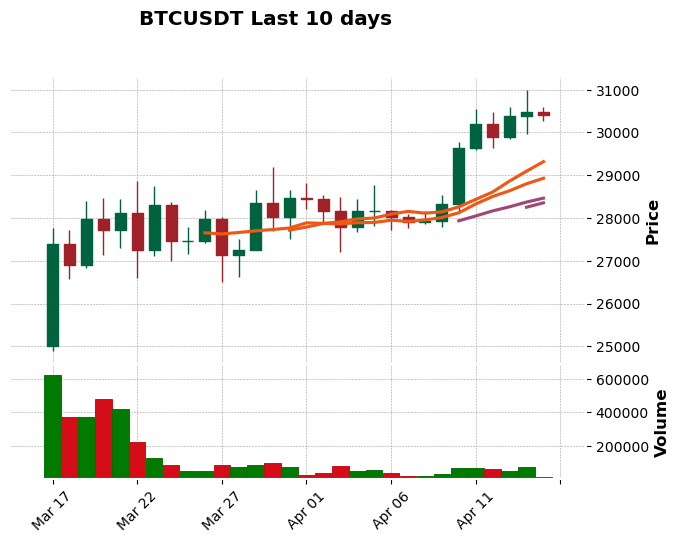

In [28]:
mpf.plot(hist_df.set_index('CloseTime').tail(30),type = 'candle',style='charles',
                                                                  volume = True,
                                                                 title ='BTCUSDT Last 10 days',
                                                                 mav=(10,15,25,29))

In [33]:
import plotly.graph_objs as go

hist_df['MA10'] = hist_df['Close'].rolling(window=10).mean()

# Convert historical data to Plotly format
trace = go.Candlestick(x=hist_df['CloseTime'],
                       open=hist_df['Open'],
                       high=hist_df['High'],
                       low=hist_df['Low'],
                       close=hist_df['Close'])

# Create layout for chart
layout = go.Layout(title='BTCUSDT Last 50 days',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price (USDT)'))

# Create figure and add trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the chart
fig.show()
